# Matthews Capstone Notebook

## Tornadoes Throughout The Last Century

### Summary

Our project given to us by our client Tom Coffin was to think on the issue Global Warming and some harmful affects it has on people. We were given a choice to what specifically we wanted to look at so we chose to analyze tornados that happen in the United States. Tornados have the ability to be extremely devasting taking human lives and destroying cities. We want to analyze two datasets and see if we can notice a trend of tornados occuring more frequently and becoming more violent in the last 20 years.


## Insert Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Our Dataset

In [2]:
dd = pd.read_csv('Tornadoes_SPC_1950to2015.csv')
dd

,om,year,month,day,date,time,time_zone,state,stf,state_number,...,fatalities,property_loss,crop_loss,slat,slon,elat,elon,length,width,estimated_f
0,1,1950,1,3,1/3/1950,11:00:00,3,MO,29,1,...,0,6.00,0.0,38.77,-90.22,38.83,-90.03,9.50,150,0
1,2,1950,1,3,1/3/1950,11:55:00,3,IL,17,2,...,0,5.00,0.0,39.10,-89.30,39.12,-89.23,3.60,130,0
2,3,1950,1,3,1/3/1950,16:00:00,3,OH,39,1,...,0,4.00,0.0,40.88,-84.58,0.00,0.00,0.10,10,0
3,4,1950,1,13,1/13/1950,5:25:00,3,AR,5,1,...,1,3.00,0.0,34.40,-94.37,0.00,0.00,0.60,17,0
4,5,1950,1,25,1/25/1950,19:30:00,3,MO,29,2,...,0,5.00,0.0,37.60,-90.68,37.63,-90.65,2.30,300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60109,607506,2015,12,28,12/28/2015,3:20:00,3,LA,22,0,...,0,0.00,0.0,30.08,-90.54,30.08,-90.53,0.60,150,0
60110,613277,2015,12,28,12/28/2015,4:46:00,3,AR,5,0,...,0,0.05,0.0,34.70,-90.92,34.78,-90.90,5.75,40,0
60111,607307,2015,12,28,12/28/2015,5:43:00,3,MS,28,0,...,0,0.10,0.0,31.54,-89.53,31.61,-89.49,5.59,100,0
60112,612738,2015,12,28,12/28/2015,8:30:00,3,FL,12,0,...,0,0.01,0.0,30.76,-87.24,30.77,-87.23,0.78,75,0


### Hypothesis

#### Hypothesis 1

F Scale of 5 is the deadliest tornadoes in last 20 years

In [3]:

hypo_1 = dd.filter(['F_Scale','year','month','fatalities','property_loss','injuries'])
hypo_1 = hypo_1.loc[hypo_1['year'] >= 1995]

hypo_1

,F_Scale,year,month,fatalities,property_loss,injuries
34194,1,1995,1,0,4.00,0
34195,1,1995,1,0,5.00,8
34196,0,1995,1,0,0.00,0
34197,1,1995,1,0,4.00,0
34198,1,1995,1,0,5.00,0
...,...,...,...,...,...,...
60109,1,2015,12,0,0.00,0
60110,2,2015,12,0,0.05,0
60111,1,2015,12,0,0.10,0
60112,1,2015,12,0,0.01,0


In [4]:
hypo_1.describe()

,F_Scale,year,month,fatalities,property_loss,injuries
count,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000,25920.000000
mean,0.527971,2004.821566,5.969907,0.065895,1.332018,0.920756
std,0.787791,5.882374,2.501564,1.359144,30.780802,14.707634
min,0.000000,1995.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2000.000000,4.000000,0.000000,0.000000,0.000000
50%,0.000000,2005.000000,6.000000,0.000000,0.000000,0.000000
75%,1.000000,2010.000000,7.000000,0.000000,0.070000,0.000000
max,5.000000,2015.000000,12.000000,158.000000,2800.100000,1500.000000


Bar plots showing total count of injuries and fatalities per F-Scale from 1995-2015

Text(0.5, 1.0, 'Total Fatalities per F-Scale in last 20 years')

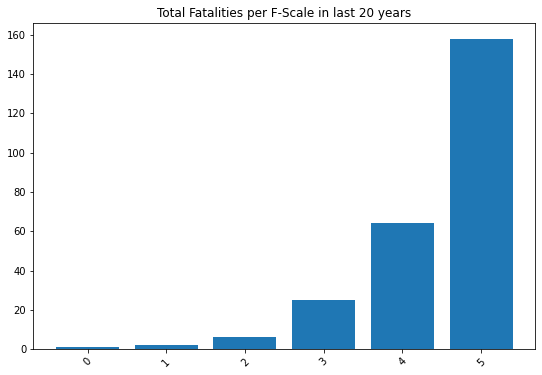

In [5]:
plt.figure(figsize = (9,6))
plt.bar(x = hypo_1['F_Scale'],
        height = hypo_1['fatalities'])
plt.xticks(rotation = 45)
plt.title('Total Fatalities per F-Scale in last 20 years')

Text(0.5, 1.0, 'Injuries per F-Scale in last 20 years')

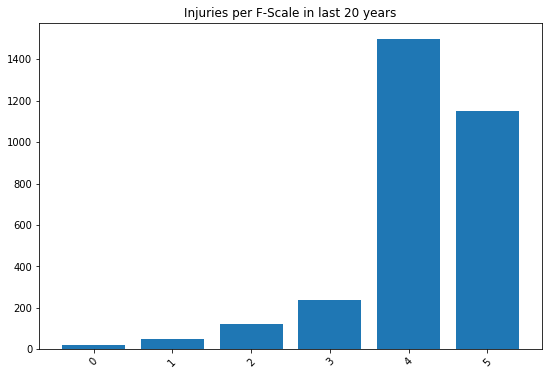

In [6]:
plt.figure(figsize = (9,6))
plt.bar(x = hypo_1['F_Scale'],
        height = hypo_1['injuries'])
plt.xticks(rotation = 45)
plt.title('Injuries per F-Scale in last 20 years')


Text(0.5, 1.0, 'Property Loss by F_Scale in last 20 years')

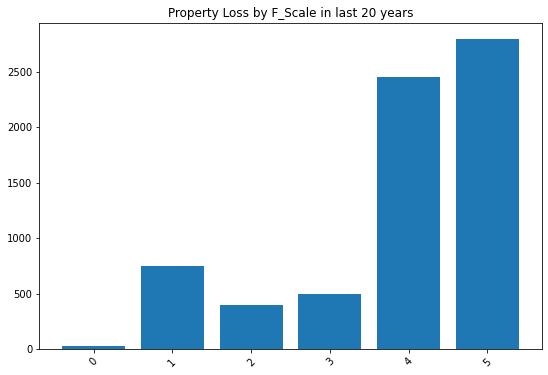

In [7]:
plt.figure(figsize = (9,6))
plt.bar(x = hypo_1['F_Scale'],
        height = hypo_1['property_loss'])
plt.xticks(rotation = 45)
plt.title('Property Loss by F_Scale in last 20 years')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  


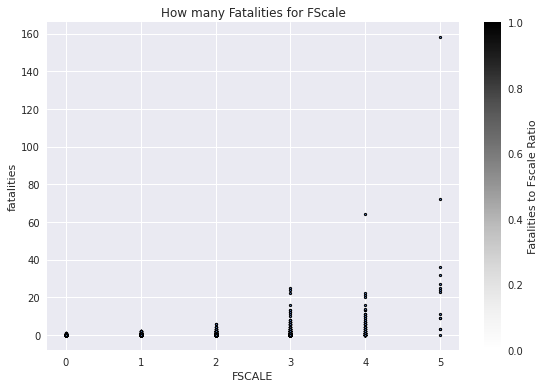

In [8]:
plt.style.use('seaborn')
fscale = hypo_1['F_Scale']
fatalities = hypo_1['fatalities']
plt.scatter(fscale,fatalities, s=5, alpha= 1,edgecolor='black', linewidth=1)

cbar = plt.colorbar()
cbar.set_label('Fatalities to Fscale Ratio')

plt.title('How many Fatalities for FScale')
plt.xlabel('FSCALE')
plt.ylabel('fatalities')
plt.tight_layout()
plt.show()

Examining injuries and fatalities with 3D plots

In [9]:
fig1 = px.scatter_3d(hypo_1, x = 'injuries', y = 'fatalities',z = 'property_loss', color = 'F_Scale', title = 'Destruction by F_Scale')
fig1.show()

In [10]:
fig = px.scatter_3d(hypo_1, x = 'injuries', y = 'fatalities', z = 'year', color = 'F_Scale', title = 'Fatalities and Injuries with Year')
fig.show()

3D plot with fatalities under 40 to get rid of outliers

In [11]:
hypo_1U40 = hypo_1.loc[hypo_1['fatalities'] <= 40]

In [12]:
fig4 = px.scatter_3d(hypo_1U40, x = 'injuries', y = 'fatalities', z = 'year', color = 'F_Scale', title = 'Fatalities and Injuries with Year (under 40 fatalities)')
fig4.show()

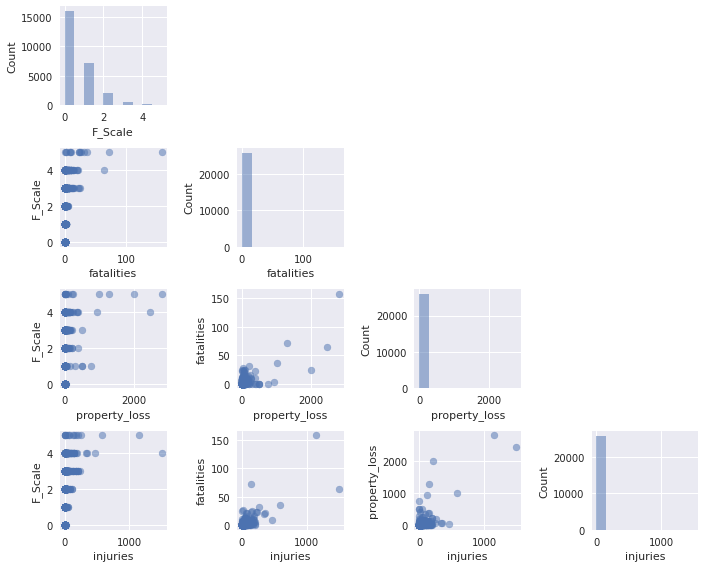

In [13]:
cols = ['F_Scale','fatalities','property_loss', 'injuries']
scatterplotmatrix(hypo_1[cols].values,figsize=(10,8),
names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

Correlations among F-Scale, fatalities, property loss, and injuries

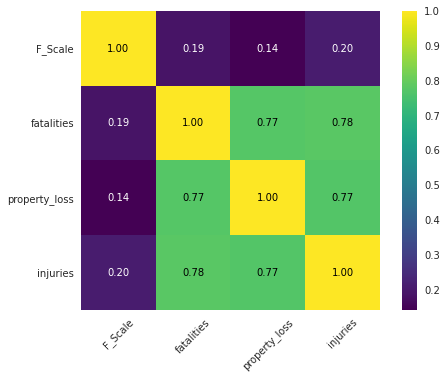

In [14]:
cm = np.corrcoef(hypo_1[cols].values.T)
hm = heatmap(cm, row_names=cols,column_names=cols)
plt.show()

Linear Regression Algorithm Testing

In [15]:
from sklearn.linear_model import LinearRegression
x = hypo_1[['fatalities']]
y = hypo_1[['F_Scale']]
x_train, x_test, y_train, y_test = train_test_split(x,y)
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)
uni = LinearRegression()
uni.fit(x_train, y_train)
uni.coef_
uni.intercept_
y_train_pred = uni.predict(x_train)

x_train.shape =  (19440, 1)
y_train.shape =  (19440, 1)
x_test.shape =  (6480, 1)
y_test.shape =  (6480, 1)


Text(0, 0.5, 'F Scale')

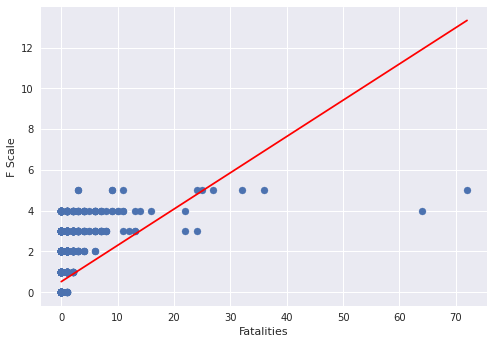

In [16]:
plt.scatter(x_train, y_train)

x_min = np.min(x_train)
x_max = np.max(x_train)
x_plot = np.linspace(x_min, x_max, 10000)
y_plot = uni.coef_ * x_plot + uni.intercept_
plt.plot(x_plot, y_plot, color='r')
plt.xlabel('Fatalities')
plt.ylabel('F Scale')

In [17]:
r2_score(y_train, y_train_pred)

0.050207119521964216

With such a low score it indicates that the response variable cannot be explained by the predictor variable 

Random Forest

In [18]:
print('The shape of our Hypothesis one is:', hypo_1.shape)

The shape of our Hypothesis one is: (25920, 6)


In [19]:
# One-hot encode the data using pandas get_dummies
hypo_1 = pd.get_dummies(hypo_1)
# Display the first 5 rows of the last 12 columns
hypo_1.iloc[:,0:].head(5)

,F_Scale,year,month,fatalities,property_loss,injuries
34194,1,1995,1,0,4.0,0
34195,1,1995,1,0,5.0,8
34196,0,1995,1,0,0.0,0
34197,1,1995,1,0,4.0,0
34198,1,1995,1,0,5.0,0


In [20]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(hypo_1['F_Scale'])
# Remove the labels from the features
# axis 1 refers to the columns
hypo_1= hypo_1.drop('F_Scale', axis = 1)
# Saving feature names for later use
hypo_1_list = list(hypo_1.columns)
# Convert to numpy array
hypo_1 = np.array(hypo_1)
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_hypo_1, test_hypo_1, train_labels, test_labels = train_test_split(hypo_1, labels, test_size = 0.25, random_state = 42)
print('Training Hypo_1 Shape:', train_hypo_1.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Hypo_1 Shape:', test_hypo_1.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Hypo_1 Shape: (19440, 5)
Training Labels Shape: (19440,)
Testing Hypo_1 Shape: (6480, 5)
Testing Labels Shape: (6480,)


In [21]:
# The baseline predictions are the historical fatalities
baseline_preds = test_hypo_1[:, hypo_1_list.index('property_loss')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  1.74


In [22]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_hypo_1, train_labels)
# Use the forest's predict method on the test data
predictions = rf.predict(test_hypo_1)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'F-Scale')

Mean Absolute Error: 0.4 F-Scale


Creating Visualizations of Trees as .png files

In [23]:

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree1.dot', feature_names = hypo_1_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree1.dot')
# Write graph to a png file
graph.write_png('tree_hypo_1.png')

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_hypo_1, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree1.dot', feature_names = hypo_1_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree1.dot')
graph.write_png('small_tree_hypo_1.png');

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

divide by zero encountered in true_divide

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning:

invalid value encountered in true_divide



Variable importances of the random forest models

In [24]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(hypo_1, round(importance, 2)) for hypo_1, importance in zip(hypo_1_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: property_loss        Importance: 0.59
Variable: injuries             Importance: 0.15
Variable: year                 Importance: 0.14
Variable: month                Importance: 0.1
Variable: fatalities           Importance: 0.02


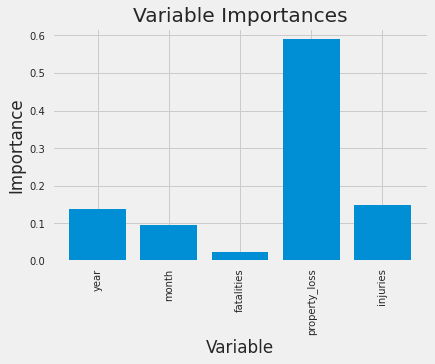

In [25]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, hypo_1_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

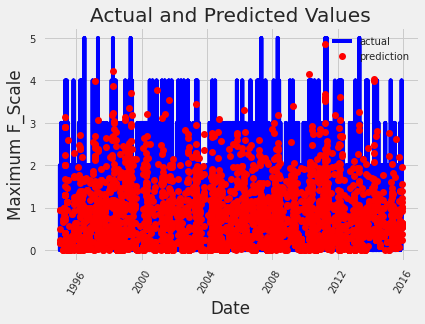

In [26]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = hypo_1[:, hypo_1_list.index('month')]
years = hypo_1[:, hypo_1_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) for year, month in zip(years, months)]
dates = [datetime.datetime.strptime(date, '%Y-%m') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_hypo_1[:, hypo_1_list.index('month')]
years = test_hypo_1[:, hypo_1_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) for year, month in zip(years, months)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum F_Scale'); plt.title('Actual and Predicted Values');

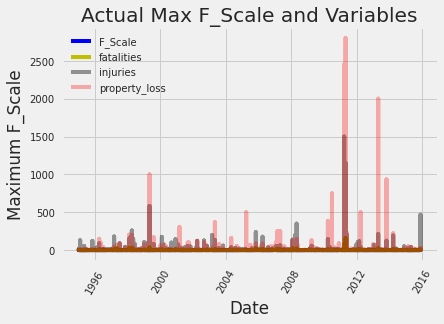

In [27]:
# Make the data accessible for plotting
true_data['fatalities'] = hypo_1[:, hypo_1_list.index('fatalities')]
true_data['injuries'] = hypo_1[:, hypo_1_list.index('injuries')]
true_data['property_loss'] = hypo_1[:, hypo_1_list.index('property_loss')]
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'F_Scale', alpha = 1.0)
plt.plot(true_data['date'], true_data['fatalities'], 'y-', label  = 'fatalities', alpha = 1.0)
plt.plot(true_data['date'], true_data['injuries'], 'k-', label = 'injuries', alpha = 0.4)
plt.plot(true_data['date'], true_data['property_loss'], 'r-', label = 'property_loss', alpha = 0.3)
# Formatting plot
plt.legend(); plt.xticks(rotation = '60');
# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum F_Scale'); plt.title('Actual Max F_Scale and Variables');

Result

The data shows that F_Scale 5 has caused more destruction and fatalities than any other F_Scale combined however when it comes to injuries F_Scale 4 is higher. However when going by average F_Scale 5 does around 4 times the amount

### Hypothesis 4

Evening time(hottest part of the day) are when the higher F-Scale tornados happen more frequently in last 20 years

In [28]:
hypo_4 = dd.filter(items =['month','year','F_Scale'])
hypo_4 = hypo_4.loc[hypo_4['year'] >= 1995]
hypo_4 = hypo_4.groupby(['month']).mean()
hypo_4.reset_index(inplace = True)
hypo_4

,month,year,F_Scale
0,1,2004.146988,0.753012
1,2,2006.029371,0.793007
2,3,2004.843150,0.704225
3,4,2006.061151,0.667009
4,5,2004.665427,0.520034
5,6,2004.787220,0.368248
6,7,2003.775654,0.351059
7,8,2004.295973,0.310738
8,9,2004.025606,0.442907
9,10,2004.312259,0.540478


In [29]:
hypo_4.describe()

,month,year,F_Scale
count,12.000000,12.000000,12.000000
mean,6.500000,2004.860767,0.579009
std,3.605551,0.923250,0.180625
min,1.000000,2003.775654,0.310738
25%,3.750000,2004.258727,0.424242
50%,6.500000,2004.662637,0.603744
75%,9.250000,2005.139705,0.716422
max,12.000000,2006.726562,0.819267


In [30]:
fig4 = px.scatter_3d(hypo_4, x = 'F_Scale', y = 'year',z = 'month' ,color = 'F_Scale',title = 'Fatalties in last 20 years')
fig4.show()

Correlation Testing

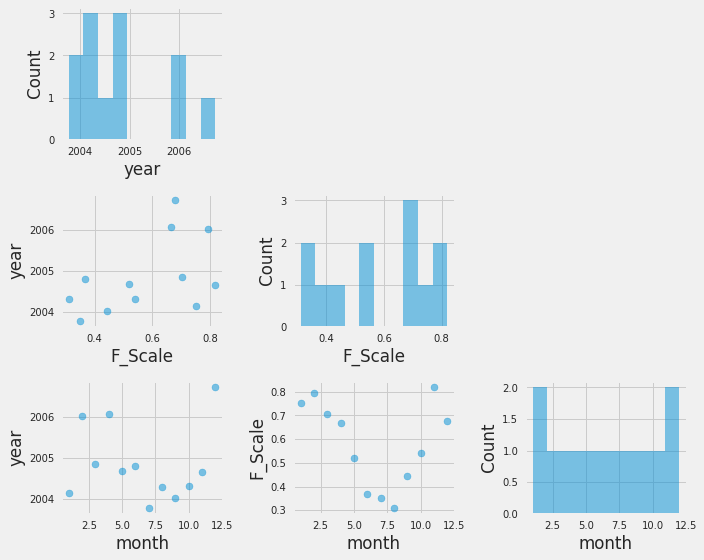

In [31]:
cols = ['year', 'F_Scale','month']
scatterplotmatrix(hypo_4[cols].values,figsize=(10,8),
names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

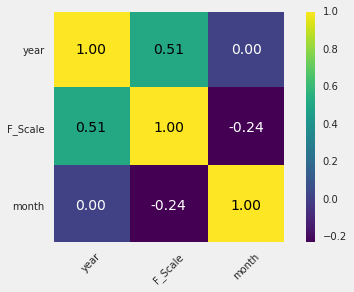

In [32]:
cm = np.corrcoef(hypo_4[cols].values.T)
hm = heatmap(cm, row_names=cols,column_names=cols)
plt.show()

Linear Regression algorithms tests

In [33]:
x = hypo_4[['month']]
y = hypo_4[['F_Scale']]
x_train, x_test, y_train, y_test = train_test_split(x,y)
print('x_train.shape = ', x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ', y_test.shape)

x_train.shape =  (9, 1)
y_train.shape =  (9, 1)
x_test.shape =  (3, 1)
y_test.shape =  (3, 1)


In [34]:
from sklearn.linear_model import LinearRegression
uni = LinearRegression()
uni.fit(x_train, y_train)
y_train_pred = uni.predict(x_train)

Text(0.5, 1.0, 'Average F-scale per Month from 1995-2015')

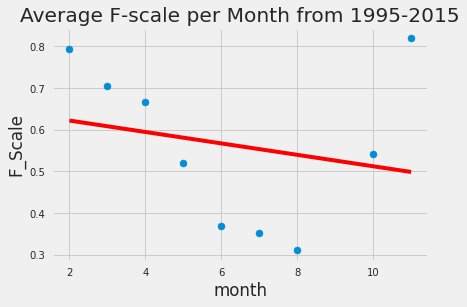

In [35]:
plt.scatter(x_train, y_train)

x_min = np.min(x_train)
x_max = np.max(x_train)
x_plot = np.linspace(x_min, x_max, 10000)
y_plot = uni.coef_ * x_plot + uni.intercept_
plt.plot(x_plot, y_plot, color='r')
plt.xlabel('month')
plt.ylabel('F_Scale')
plt.title("Average F-scale per Month from 1995-2015")

In [36]:
r2_score(y_train, y_train_pred)

0.04760008709013175

Random Forest

In [37]:
print('The shape of our Hypothesis Four is:', hypo_4.shape)

The shape of our Hypothesis Four is: (12, 3)


In [38]:
# One-hot encode the data using pandas get_dummies
hypo_4 = pd.get_dummies(hypo_4)
# Display the first 5 rows of the last 12 columns
hypo_4.iloc[:,0:].head(5)

,month,year,F_Scale
0,1,2004.146988,0.753012
1,2,2006.029371,0.793007
2,3,2004.843150,0.704225
3,4,2006.061151,0.667009
4,5,2004.665427,0.520034


In [39]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(hypo_4['F_Scale'])
# Remove the labels from the features
# axis 1 refers to the columns
hypo_1= hypo_4.drop('F_Scale', axis = 1)
# Saving feature names for later use
hypo_4_list = list(hypo_4.columns)
# Convert to numpy array
hypo_4 = np.array(hypo_4)
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_hypo_4, test_hypo_4, train_labels, test_labels = train_test_split(hypo_4, labels, test_size = 0.25, random_state = 42)
print('Training Hypo_4 Shape:', train_hypo_4.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Hypo_4 Shape:', test_hypo_4.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Hypo_4 Shape: (9, 3)
Training Labels Shape: (9,)
Testing Hypo_4 Shape: (3, 3)
Testing Labels Shape: (3,)


In [40]:
# The baseline predictions are the historical Year
baseline_preds = test_hypo_4[:, hypo_4_list.index('year')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))


Average baseline error:  2003.67


In [41]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_hypo_4, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_hypo_4)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.16 degrees.


In [42]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 78.76 %.


In [43]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree4.dot', feature_names = hypo_4_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree4.dot')
# Write graph to a png file
graph.write_png('tree_hypo_4.png')

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_hypo_4, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree4.dot', feature_names = hypo_4_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree4.dot')
graph.write_png('small_tree_hypo_4.png');

Variable Importances

In [44]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(hypo_4, round(importance, 2)) for hypo_4, importance in zip(hypo_4_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: F_Scale              Importance: 0.45
Variable: year                 Importance: 0.38
Variable: month                Importance: 0.17


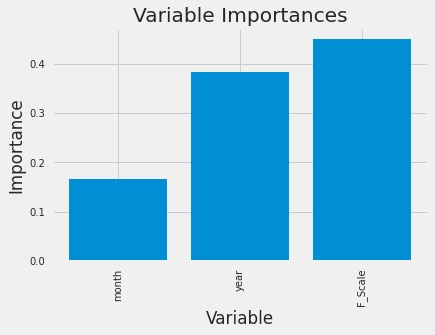

In [45]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, hypo_4_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [46]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [hypo_4_list.index('F_Scale'), hypo_4_list.index('year')]
train_important = train_hypo_4[:, important_indices]
test_important = test_hypo_4[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.13 degrees.
Accuracy: 81.79 %.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b69fa25-3793-43a5-802e-454f209b9cd0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>